<a href="https://colab.research.google.com/github/Subham4753/Product_Category_Prediction/blob/main/Product_category_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRODUCT CATEGORY PREDICTION**

#### **ABOUT THE DATASET:**

#### This is a pre-crawled dataset, taken as subset of a bigger data set (more than 5.8 million products) that was created by extracting data from Flipkart.com, a leading Indian eCommerce store.

#### **SOURCE:**

Dataset-https://docs.google.com/spreadsheets/d/1pLv0fNE4WHokpJHUIs-FTVnmI9STgog05e658qEON0I/edit?usp=sharing

Naive Bayes Classifier-https://www.geeksforgeeks.org/naive-bayes-classifiers/
https://www.youtube.com/watch?v=O2L2Uv9pdDA

Gaussian NB:https://www.youtube.com/watch?v=H3EjCKtlVog



#### **ASSUMPTIONS**

#### Only five product category data is considered from the total set.

#### **OBJECTIVE:**




*   We will pick a pre-crawled dataset in CSV format and read this dataset into a DataFrame using Pandas python library.
*   Performed data preparation, cleaning and processing.
*   Performed some Data Visualization Techniques using Matplotlib and Seaborn.
*   Figuring out the Main Category and then only five category data is considered from the total set,defining the model using MultinomialNb and the model is used to predict the Product Category using Description.
*   Measuring the accuracy of the model.


*   Improving the accuracy of the model.










In [ ]:
import pandas as pd 
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv to flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv


In [ ]:
pip install nltk


##### **Before analysing the dataset, let's first import all the python libraries required.**


In [ ]:

import numpy as np 
import pandas as pd
import re 
import nltk 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


##**DATA PREPARATION** 

##### **To read the file, we can use the read_csv method from Pandas. Data from the file is read and stored in a DataFrame object import_df.**

In [ ]:
import_df = pd.read_csv('flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv')
import_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [ ]:
import_df['product_category_tree']

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object

##### **In the 'product_category_tree' we have separated all the categories and figured out the Primary Category.Here clothing,footwear etc are the Primary Category which are again stored in product_category_tree attribute.**

In [ ]:
import_df['product_category_tree'] = import_df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:].strip())
import_df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,Baby Care,STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,Baby Care,STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,Baby Care,STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,Baby Care,STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


##### **Listing Top Five Categories**

In [ ]:
top_five_category=list(import_df.groupby('product_category_tree').count().sort_values(by='uniq_id',ascending=False).head(5).index)
top_five_category

['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories', 'Automotive']

## **DATA CLEANING**

##### **Creating a new DataFrame 'processed_df' that contains only relevant columns i.e top 5 categories and its corresponding description**

In [ ]:
processed_df = import_df[import_df['product_category_tree'].isin(top_five_category)][['description','product_category_tree']]
processed_df

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
2,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
6,Key Features of Alisha Solid Women's Cycling S...,Clothing
8,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear
...,...,...
19936,Flipkart.com: Buy Purple Women Heels only for ...,Footwear
19941,Flipkart.com: Buy Pinq Chiq Women Heels only f...,Footwear
19953,Flipkart.com: Buy La Isla Women Heels only for...,Footwear
19958,Flipkart.com: Buy We Witches Comfy Hues Women ...,Footwear


#####'**Processed_df1' another dataframe has been created for Visualization purpose which is same as 'Processed_df'**

In [ ]:
#dataframe created for visualization
processed_df1= import_df[import_df['product_category_tree'].isin(top_five_category)][['description','product_category_tree']]



##### **Any data or information stored within a Python variable has a type. The type of data stored within a variable can be checked using the type function.**


In [ ]:
type('description')

str

In [ ]:
type(processed_df)

pandas.core.frame.DataFrame

##### **The Shape method is used to retrieve the number of rows and columns as a tuple in the data frame.**

In [ ]:
processed_df.shape

(13067, 2)

##### **The columns property gets the list of columns within the specified data frame.**


In [ ]:
processed_df.columns

Index(['description', 'product_category_tree'], dtype='object')

##### **The info method views some basic information about the data frame.**


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13067 entries, 0 to 19962
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            13066 non-null  object
 1   product_category_tree  13067 non-null  object
dtypes: object(2)
memory usage: 306.3+ KB


##### **The describe method can view the some statistical information like count,unique,top,frequency, mean, standard deviation, minimum/maximum values and number of non-empty values.**


In [ ]:
processed_df.describe()

,description,product_category_tree
count,13066,13067
unique,11174,5
top,TheLostPuppy Back Cover for Apple iPad Air (Mu...,Clothing
freq,92,6198


## **DATA PROCESSING**

##### **This function cleans the input text as mentioned in comments.**
##### **input: str_arg --> Takes string to clean**
##### **output: cleaned_str --> Returns back cleaned string**
  

In [ ]:
def preprocess_string(str_arg):
  cleaned_str=re.sub('[^a-z\s]+',' ',str_arg,flags=re.IGNORECASE) #every char except alphabets are replaced by a single space
  cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
  cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
  
  return cleaned_str # Returning the preprocessed string in tokenized form


##### **apply method takes a function as an input and applies this function to the entire DataFrame**
##### **Here description column of processed_df is converted to str type ,and then preprocess_string function is applied on it**

In [ ]:
processed_df['description']=processed_df['description'].astype('str').apply(preprocess_string) #cleaning strings
processed_df


,description,product_category_tree
0,key features of alisha solid women s cycling s...,Clothing
2,key features of aw bellies sandals wedges heel...,Footwear
3,key features of alisha solid women s cycling s...,Clothing
6,key features of alisha solid women s cycling s...,Clothing
8,key features of dilli bazaaar bellies corporat...,Footwear
...,...,...
19936,flipkart com buy purple women heels only for r...,Footwear
19941,flipkart com buy pinq chiq women heels only fo...,Footwear
19953,flipkart com buy la isla women heels only for ...,Footwear
19958,flipkart com buy we witches comfy hues women w...,Footwear


##### **Creating a list of unique product categories out of main DataFrame**

In [ ]:
category_list=list (processed_df['product_category_tree'].unique())
category_list

['Clothing', 'Footwear', 'Automotive', 'Mobiles & Accessories', 'Jewellery']

##### **Label Encoding is an important pre-processing step for the structured dataset.**
##### **This refers to converting the labels into numeric form so as to convert it into the machine-readable form.**

In [ ]:
## Encoding the product category
label_encoder=preprocessing.LabelEncoder()
processed_df['product_category_tree']=label_encoder.fit_transform(processed_df['product_category_tree'])

processed_df['product_category_tree']                                               

0        1
2        2
3        1
6        1
8        2
        ..
19936    2
19941    2
19953    2
19958    2
19962    2
Name: product_category_tree, Length: 13067, dtype: int64

####This is an important preprocessing step for the structured dataset in supervised learning.


## **DATA VISUALIZATION**

##### **Finding the number of records which are null at each column**

In [ ]:
import_df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

##### **A heat map (or heatmap) is a graphical representation of data where values are depicted by color. Heat maps make us easy to visualize complex data and understand that at a glance.**


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text major ticklabel objects>)

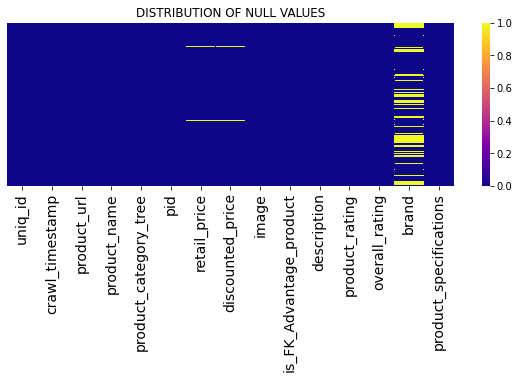

In [ ]:
plt.figure(figsize =(10,3))
plt.title('DISTRIBUTION OF NULL VALUES')
sns.heatmap(import_df.isnull(),yticklabels=False,cmap='plasma',cbar=True)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

**Conclusion:** **Above HeatMap shows that the Brand Column has maximum number of Null Values which is visualized by the bright colour yellow.**

##### **A bar chart or is a chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

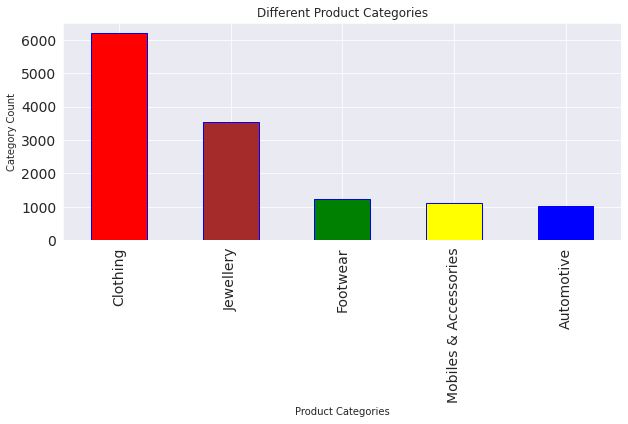

In [ ]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
plt.title('Different Product Categories')
processed_df1['product_category_tree'].value_counts().sort_values(ascending=False).plot(kind='bar',color=['red','brown','green','yellow','blue'],edgecolor='blue')
plt.xlabel('Product Categories')
plt.ylabel('Category Count')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

 **Conclusion:Above Bar chart looks like most of the customer prefer getting Cloths from Flipkart which is visualized by the longest bar(Red)
 Clothing.** 

##### **Make 'crawl_timestamp' column into a datetime type for workability**

In [ ]:
import_df['crawl_timestamp']=pd.to_datetime(import_df['crawl_timestamp'])
import_df['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

##### **Finding yearwise the sale of a product :**

In [ ]:
import_df['crawl_year']=import_df['crawl_timestamp'].apply(lambda x : x.year)
import_df['crawl_year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
19995    2015
19996    2015
19997    2015
19998    2015
19999    2015
Name: crawl_year, Length: 20000, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

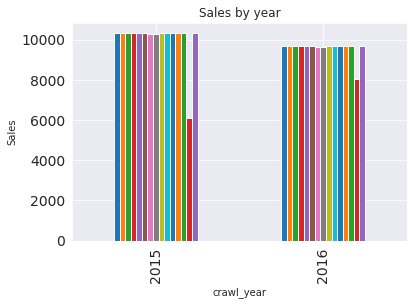

In [ ]:
import_df.groupby(by='crawl_year',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')
plt.title('Sales by year')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

**Conclusion:** **The above chart looks like both the year 2015 and 2016 has almost same amount of sale.**

# **PRODUCT CATEGORY PREDICTION**

##### **Here we are slicing the Dataset into Training set(a subset to train a model) and Test set(a subset to test the trained model).**
##### **In the below code description and product_category_tree are splitted into Training and Testing sets.**


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(processed_df['description'],processed_df['product_category_tree'],test_size=0.2)

##### **CountVectorizer gives the frequency of occurence of each words in its vocabulary**
##### **stop_words='english'-List of words we donot want to use as feature.**
##### **Below code block removes the stop_words and converts the training data to feature vectorized form.**

In [ ]:
vect=CountVectorizer(stop_words='english')
X_train_matrix=vect.fit_transform(X_train)

#### **Multinomial Naive Bayes is used to train the model.**
##### **Multinomial Naive Bayes :The feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.**


*    **Since the given dataset is discrete and follows Multinomial distribution,so Multinomial NB classifier is used.**


##### **Below code block is for training the model with vectorized data and calculating the score.**


In [ ]:
mnb=MultinomialNB()#Defining model
mnb.fit(X_train_matrix, Y_train)# fitting to multinomialNB model

print("Score for the trained model:" 
      ,mnb.score(X_train_matrix, Y_train)) #Checks how well the model explains the data 

Score for the trained model: 0.9922510284128958


##### **Below code converts the testdata to feature vectorized form and calculating the score.**

In [ ]:
X_test_matrix=vect.transform(X_test)

print("Score for the test data:" ,mnb.score(X_test_matrix , Y_test))# Score for the test data

Score for the test data: 0.9885233358837031


##### **Metric is used for classification performance.It is a module in sklearn.**
##### **Below code block measures the accuracy of the model.**
##### **Firstly the trained model is predicting the product category using predict method which takes test vectorized data(X_test_matrix) as input.**

##### **Then the accuracy of the model is checked using actual test product_category and predicted  product_category.**


In [ ]:
y_predicted=mnb.predict(X_test_matrix)
print("Accuracy of the model (in%):" , metrics.accuracy_score(Y_test,y_predicted)*100)

Accuracy of the model (in%): 98.85233358837031


In [ ]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       210
           1       1.00      0.99      0.99      1268
           2       0.98      0.99      0.98       224
           3       0.98      0.99      0.98       693
           4       1.00      0.95      0.97       219

    accuracy                           0.99      2614
   macro avg       0.99      0.98      0.98      2614
weighted avg       0.99      0.99      0.99      2614



##### **Testing Block**
##### **Predicting the Category**

In [ ]:
label_encoder.inverse_transform(mnb.predict(vect.transform(['car'])))

array(['Automotive'], dtype=object)

### **Can the above accuracy of the model be improved?**

#### Yes,the accuracy of the model can be improved to give precise result and the  Various ways are listed below:
#### 1.*Add more Training Data*->
Having more amount of data means adding variety of data that can cover wide-ranging scenario to avoid the biased decisions. 

#### 2.*Feature Engineering*-> 
This step helps to extract more information from existing data. New information is extracted in terms of new features. These features may have a higher ability to explain the variance in the training data. Thus, giving improved model accuracy.


#### 3.*Treat missing and outlier values*->
This step helps to extract more information from existing data. New information is extracted in terms of new features. These features may have a higher ability to explain the variance in the training data. Thus, giving improved model accuracy.


#### 4.*Ensemble methods*->
This technique simply combines the result of multiple weak models and produce better results. This can be achieved through many ways:

   Bagging 
   
   Boosting

#### 5.*Cross Validation->*  Cross Validation is one of the most important concepts in data modeling. It says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.


#### **Other algorithms we can try to improve accuracy of the model:**

#### 1. *Multiple algorithms*:

Hitting at the right  algorithm is the ideal approach to achieve higher accuracy. But, it is easier.
This intuition comes with experience and incessant practice. Some algorithms are better suited to a particular type of data sets than others. Hence, we should apply all relevant models and check the performance.

#### 2. *Algorithm Tuning*:
The objective of parameter tuning is to find the optimum value for each parameter to improve the accuracy of the model. To tune these parameters, you must have a good understanding of these meaning and their individual impact on model. You can repeat this process with a number of well performing models.



## **CONCLUSION**:

After predicting the product_category on the given Flipkart DataSet we can say that 

*  Multinomial Naive Bayes classifier works very well for this data set with an above 99% accuracy.This is a business ready model to deploy.



*   Also we have seen that most of the customer prefer getting Cloths from Flipkart.


